In [27]:
'''This file contains the code and results for the multiclass classification movie revenue prediction problem'''

# Pull in raw dataset to coding environment utilizing pandas to read the csv, provide a dataframe structure and add correspoding attribute labels:

from pandas.core.ops.array_ops import isna
import os
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

# Raw dataset is stored in Google Drive. Mounted google drive to access original IMDB dataset:
movies = pd.read_csv('/content/drive/MyDrive/820/21Jan2023- 820- Movie metadata.csv')

col_names = ["Color", "Director Name", "# Critic Reviews", "Duration", "# Director Likes", "# Actor 1 Likes", "Actor 2 Name", "# Actor 1 Likes", "Gross", "Genres", 
             "Actor 1 Name", "Movie Title", "# Users Voted", "# Cast Likes", "Actor 3 Name", "# FB Poster", "Plot Keywords", "Movie Link", "# Users for Reviews", "Langauge", "Country",
             "Content Rating", "Budget", "Title Year", "# Actor 2 Likes", "IMDB Score", "Aspect Ratio", "# Movie Likes"]
movies.columns = col_names

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
movies.head()

,Color,Director Name,# Critic Reviews,Duration,# Director Likes,# Actor 1 Likes,Actor 2 Name,# Actor 1 Likes,Gross,Genres,...,# Users for Reviews,Langauge,Country,Content Rating,Budget,Title Year,# Actor 2 Likes,IMDB Score,Aspect Ratio,# Movie Likes
0,Color,James Cameron,723.00,178.00,0.00,855.00,Joel David Moore,1000.00,760505847.00,Action|Adventure|Fantasy|Sci-Fi,...,3054.00,English,USA,PG-13,237000000.00,2009.00,936.00,7.90,1.78,33000
1,Color,Gore Verbinski,302.00,169.00,563.00,1000.00,Orlando Bloom,40000.00,309404152.00,Action|Adventure|Fantasy,...,1238.00,English,USA,PG-13,300000000.00,2007.00,5000.00,7.10,2.35,0
2,Color,Sam Mendes,602.00,148.00,0.00,161.00,Rory Kinnear,11000.00,200074175.00,Action|Adventure|Thriller,...,994.00,English,UK,PG-13,245000000.00,2015.00,393.00,6.80,2.35,85000
3,Color,Christopher Nolan,813.00,164.00,22000.00,23000.00,Christian Bale,27000.00,448130642.00,Action|Thriller,...,2701.00,English,USA,PG-13,250000000.00,2012.00,23000.00,8.50,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.00,NaN,Rob Walker,131.00,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.00,7.10,NaN,0


In [29]:
# Remove missing data and provide verification via the table below prior to moving forward with further preparation steps:

movies = movies.dropna()
pd.set_option('float_format', '{:.2f}'.format)
show_Missing = movies.isna().sum()
show_Missing

Color                  0
Director Name          0
# Critic Reviews       0
Duration               0
# Director Likes       0
# Actor 1 Likes        0
Actor 2 Name           0
# Actor 1 Likes        0
Gross                  0
Genres                 0
Actor 1 Name           0
Movie Title            0
# Users Voted          0
# Cast Likes           0
Actor 3 Name           0
# FB Poster            0
Plot Keywords          0
Movie Link             0
# Users for Reviews    0
Langauge               0
Country                0
Content Rating         0
Budget                 0
Title Year             0
# Actor 2 Likes        0
IMDB Score             0
Aspect Ratio           0
# Movie Likes          0
dtype: int64

In [30]:
from pandas.core.groupby.grouper import DataFrame

# Initialize gross revenue classes for our multi- class classification problem. 

'''Revenue Classes:
      $0 - 24.99M
      $25 - 99.99M
      $100 - 249.99M
      $250 - 499.99M
      $500M - 1000000000'''

#Assign each movie to a REVENUE CLASS:
movies['Classes'] = pd.cut(movies.Gross, bins = [0, 24999999, 99999999,249999999, 499999999, 1000000000], 
       labels = ['Class 1','Class 2', 'Class 3', 'Class 4', 'Class 5'])

In [31]:
# Remove unwanted features:
movies = movies.drop(['Movie Title', 'Movie Link', 'Plot Keywords'], axis = 1) 

# Set aside the Classes label for future train-test splitting:
y = movies.pop('Classes')

In [32]:
# Utilize sci-kit learn machine learning packages:

from sklearn import preprocessing

# Encode each text- based variable with a corresponding numerical value:
label_encoder = preprocessing.LabelEncoder()
one_hot_encoder = preprocessing.OneHotEncoder()

movies['Director Name'] = label_encoder.fit_transform(movies['Director Name'])
movies['Color'] = label_encoder.fit_transform(movies['Color'])
movies['Actor 2 Name'] = label_encoder.fit_transform(movies['Actor 2 Name'])
movies['Genres'] = label_encoder.fit_transform(movies['Genres'])
movies['Langauge'] = label_encoder.fit_transform(movies['Langauge'])
movies['Country'] = label_encoder.fit_transform(movies['Country'])
movies['Content Rating'] = label_encoder.fit_transform(movies['Content Rating'])
movies['Title Year'] = label_encoder.fit_transform(movies['Title Year'])
movies['Actor 1 Name'] = label_encoder.fit_transform(movies['Actor 1 Name'])
movies['Actor 3 Name'] = label_encoder.fit_transform(movies['Actor 3 Name'])

movies.head()

,Color,Director Name,# Critic Reviews,Duration,# Director Likes,# Actor 1 Likes,Actor 2 Name,# Actor 1 Likes,Gross,Genres,...,# Users for Reviews,Langauge,Country,Content Rating,Budget,Title Year,# Actor 2 Likes,IMDB Score,Aspect Ratio,# Movie Likes
0,1,620,723.00,178.00,0.00,855.00,1002,1000.00,760505847.00,91,...,3054.00,9,43,7,237000000.00,66,936.00,7.90,1.78,33000
1,1,538,302.00,169.00,563.00,1000.00,1592,40000.00,309404152.00,85,...,1238.00,9,43,7,300000000.00,64,5000.00,7.10,2.35,0
2,1,1395,602.00,148.00,0.00,161.00,1795,11000.00,200074175.00,107,...,994.00,9,42,7,245000000.00,72,393.00,6.80,2.35,85000
3,1,251,813.00,164.00,22000.00,23000.00,381,27000.00,448130642.00,243,...,2701.00,9,43,7,250000000.00,69,23000.00,8.50,2.35,164000
5,1,62,462.00,132.00,475.00,530.00,1837,640.00,73058679.00,105,...,738.00,9,43,7,263700000.00,69,632.00,6.60,2.35,24000


In [33]:
# Utilize min-max scaling method to provide a relative numerical scale to the data:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(movies)
scaled_Movies = scaler.fit_transform(movies)
scaled_Movies = pd.DataFrame(scaled_Movies, columns = movies.columns)
print(scaled_Movies.head())

   Color  Director Name  # Critic Reviews  Duration  # Director Likes  \
0   1.00           0.37              0.89      0.48              0.00   
1   1.00           0.32              0.37      0.45              0.02   
2   1.00           0.84              0.74      0.38              0.00   
3   1.00           0.15              1.00      0.43              0.96   
4   1.00           0.04              0.57      0.32              0.02   

   # Actor 1 Likes  Actor 2 Name  # Actor 1 Likes  Gross  Genres  ...  \
0             0.04          0.46             0.00   1.00    0.12  ...   
1             0.04          0.73             0.06   0.41    0.11  ...   
2             0.01          0.82             0.02   0.26    0.14  ...   
3             1.00          0.17             0.04   0.59    0.33  ...   
4             0.02          0.84             0.00   0.10    0.14  ...   

   # Users for Reviews  Langauge  Country  Content Rating  Budget  Title Year  \
0                 0.60      0.27     0.98

In [34]:
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#Separate into training and validation sets, remember that the y variable representing the class label has already been initialized in a previous step:
X = scaled_Movies

In [35]:
# Partitioning the data into training, test and validation sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, train_size = 0.8, shuffle = True)

In [36]:
# Utilize Gaussian Naive Bayes:

from sklearn.naive_bayes import GaussianNB

gnb_Model = GaussianNB()

# Train the model on the data:
gnb_Model.fit(X_train, y_train)

# Generate predictions:
gnb_Predictions = gnb_Model.predict(X_test)

# Display the first 20 predictions:
gnb_Predictions[0:20]

array(['Class 1', 'Class 4', 'Class 2', 'Class 1', 'Class 2', 'Class 1',
       'Class 4', 'Class 4', 'Class 1', 'Class 4', 'Class 1', 'Class 1',
       'Class 4', 'Class 1', 'Class 2', 'Class 1', 'Class 2', 'Class 1',
       'Class 1', 'Class 4'], dtype='<U7')

In [37]:
# Utilize Support Vector Machine:

from sklearn import svm

svm_Model = svm.SVC(kernel = 'linear') 

# Train the model on the data:
svm_Model.fit(X_train, y_train)

# Generate predictions:
svm_Predictions = svm_Model.predict(X_test)

# Display the first 20 predictions:
svm_Predictions[0:20]

array(['Class 1', 'Class 3', 'Class 2', 'Class 1', 'Class 1', 'Class 1',
       'Class 3', 'Class 2', 'Class 1', 'Class 2', 'Class 1', 'Class 1',
       'Class 3', 'Class 1', 'Class 2', 'Class 1', 'Class 2', 'Class 1',
       'Class 1', 'Class 3'], dtype=object)

In [38]:
# Utilize Decision Tree:

from sklearn import tree

tree_Model = tree.DecisionTreeClassifier()

# Train the model on the data:
tree_Model = tree_Model.fit(X_train, y_train)

# Generate predictions:
tree_Predictions = tree_Model.predict(X_test)

# Display the first 20 predictions:
tree_Predictions[0:20]

array(['Class 1', 'Class 3', 'Class 2', 'Class 1', 'Class 2', 'Class 1',
       'Class 3', 'Class 2', 'Class 1', 'Class 2', 'Class 1', 'Class 1',
       'Class 3', 'Class 1', 'Class 2', 'Class 1', 'Class 2', 'Class 1',
       'Class 1', 'Class 3'], dtype=object)

In [39]:
# Utilize machine learning evaluation tools to assess the performance of the model:

from sklearn import metrics

# Calculate and display the accuracy scores for each model:
print("Accuracy: GAUSSIAN NAIVE BAYES:", metrics.accuracy_score(y_test, gnb_Predictions))
print("Accuracy: SVM:", metrics.accuracy_score(y_test, svm_Predictions))
print("Accuracy: DECISION TREE:", metrics.accuracy_score(y_test, tree_Predictions))

Accuracy: GAUSSIAN NAIVE BAYES: 0.625
Accuracy: SVM: 0.8723404255319149
Accuracy: DECISION TREE: 0.9986702127659575


In [40]:
# Utilize cross- validation techniques to evaluate the performance of the model:

from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict

# Perform 10- fold cross validation testing on the Gaussian Naive Bayes model:
k_folds = KFold(n_splits=10)
gnb_cross_Scores = cross_val_score(gnb_Model, X_test, y_test, cv = k_folds)

# Display accuracy scores for each of the 10 tests:
gnb_cross_Scores

array([0.30263158, 0.31578947, 0.28      , 0.25333333, 0.24      ,
       0.33333333, 0.28      , 0.29333333, 0.28      , 0.32      ])

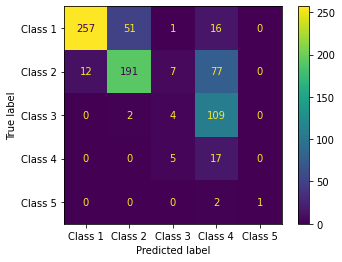

In [41]:
# Display Confusion Matrix to visualize the performance of the Gaussian Naive Bayes predictions:

cm_gnb = confusion_matrix(y_test, gnb_Predictions, labels = gnb_Model.classes_)
disp_gnb =  ConfusionMatrixDisplay(confusion_matrix = cm_gnb, display_labels = gnb_Model.classes_)
disp_gnb.plot()
plt.show()

In [42]:
# Perform 10- fold cross validation testing on the Gaussian Naive Bayes model:
k_folds = KFold(n_splits = 10)
svm_cross_Scores = cross_val_score(svm_Model, X_test, y_test, cv = k_folds)

# Display accuracy scores for each of the 10 tests:
svm_cross_Scores

array([0.78947368, 0.82894737, 0.72      , 0.69333333, 0.70666667,
       0.62666667, 0.61333333, 0.82666667, 0.70666667, 0.69333333])

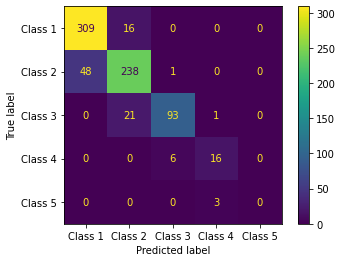

In [43]:
# Display Confusion Matrix to visualize the performance of the Suppoer Vector Machine predictions:

cm_svm = confusion_matrix(y_test, svm_Predictions, labels = svm_Model.classes_)
disp_svm =  ConfusionMatrixDisplay(confusion_matrix = cm_svm, display_labels = svm_Model.classes_)
disp_svm.plot()
plt.show()

In [44]:
# Perform 10- fold cross validation testing on the Decision Tree model:
k_folds = KFold(n_splits = 10)
tree_cross_Scores = cross_val_score(tree_Model, X_test, y_test, cv = k_folds)

# Display accuracy scores for each of the 10 tests:
tree_cross_Scores

array([1.        , 0.98684211, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

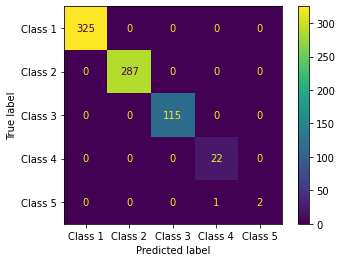

In [45]:
# Display Confusion Matrix to visualize the performance of the Decision Tree predictions:
cm_Tree = confusion_matrix(y_test, tree_Predictions, labels = tree_Model.classes_)
disp_Tree =  ConfusionMatrixDisplay(confusion_matrix = cm_Tree, display_labels = tree_Model.classes_)
disp_Tree.plot()
plt.show()